In [12]:
import pandas as pd
import re
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Load the datasets
imdb_dataset_path = 'IMDB Dataset.csv'
reviews_dataset_path = 'reviews.csv'

# Load IMDB dataset
imdb_data = pd.read_csv(imdb_dataset_path)
# Load Bahasa Indonesia reviews dataset
reviews_data = pd.read_csv(reviews_dataset_path)

# Display the first few rows of both datasets to understand their structure
imdb_data_head = imdb_data.head()
reviews_data_head = reviews_data.head()

imdb_data_info = imdb_data.info()
reviews_data_info = reviews_data.info()

imdb_data_head, reviews_data_head, imdb_data_info, reviews_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


(                                              review sentiment
 0  One of the other reviewers has mentioned that ...  positive
 1  A wonderful little production. <br /><br />The...  positive
 2  I thought this was a wonderful way to spend ti...  positive
 3  Basically there's a family where a little boy ...  negative
 4  Petter Mattei's "Love in the Time of Money" is...  positive,
 None)

In [13]:
# Download stopwords for English dataset
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))

import nltk
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))

# Function for cleaning English text
def clean_text_en(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words_en])  # Remove stopwords
    return text

# Function for cleaning Indonesian text (without stemming)
def clean_text_id(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower()  # Convert to lowercase

# Load datasets
imdb_data = pd.read_csv('IMDB Dataset.csv')
reviews_data = pd.read_csv('reviews.csv')

# Clean the IMDB dataset (English)
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_text_en)

# Clean the Reviews dataset (Bahasa Indonesia)
reviews_data['cleaned_review'] = reviews_data['reviews'].apply(clean_text_id)

# Show a sample of cleaned data
print(imdb_data[['review', 'cleaned_review']].head())
print(reviews_data[['reviews', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pixiedust\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization for IMDB dataset
tfidf_imdb = TfidfVectorizer(max_features=100)
X_imdb = tfidf_imdb.fit_transform(imdb_data['cleaned_review'])

# TF-IDF Vectorization for Reviews (Indonesian) dataset
tfidf_reviews = TfidfVectorizer(max_features=100)
X_reviews = tfidf_reviews.fit_transform(reviews_data['cleaned_review'])

# Prepare labels (target variable)
y_imdb = imdb_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y_reviews = reviews_data['label']

In [4]:
# Split the datasets into training and testing sets (80% train, 20% test)
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X_imdb, y_imdb, test_size=0.2, random_state=42)
X_train_reviews, X_test_reviews, y_train_reviews, y_test_reviews = train_test_split(X_reviews, y_reviews, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Naive Bayes': MultinomialNB(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=10),
        'SVM': SVC()
    }
    
    results = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    
    return pd.DataFrame(results)

# Train and evaluate on IMDB dataset
results_imdb = train_and_evaluate(X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb)
print("IMDB Dataset Results:")
print(results_imdb)

# Train and evaluate on Indonesian Reviews dataset
results_reviews = train_and_evaluate(X_train_reviews, X_test_reviews, y_train_reviews, y_test_reviews)
print("Indonesian Reviews Dataset Results:")
print(results_reviews)

IMDB Dataset Results:
           Logistic Regression  Naive Bayes  Decision Tree  Random Forest  \
Accuracy              0.737400     0.728500       0.627200       0.687700   
Precision             0.736337     0.732121       0.632344       0.719826   
Recall                0.745981     0.727327       0.621552       0.622544   
F1-Score              0.741128     0.729716       0.626902       0.667660   

                SVM  
Accuracy   0.741800  
Precision  0.739054  
Recall     0.753721  
F1-Score   0.746316  
Indonesian Reviews Dataset Results:
           Logistic Regression  Naive Bayes  Decision Tree  Random Forest  \
Accuracy              0.880240     0.868263       0.706587       0.796407   
Precision             0.931507     0.942029       0.736111       0.876923   
Recall                0.819277     0.783133       0.638554       0.686747   
F1-Score              0.871795     0.855263       0.683871       0.770270   

                SVM  
Accuracy   0.880240  
Precision  0.909

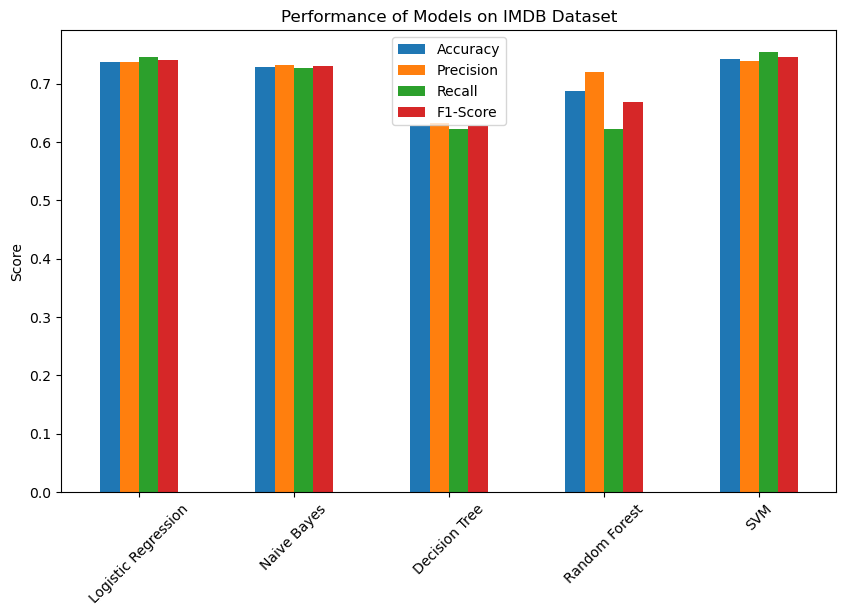

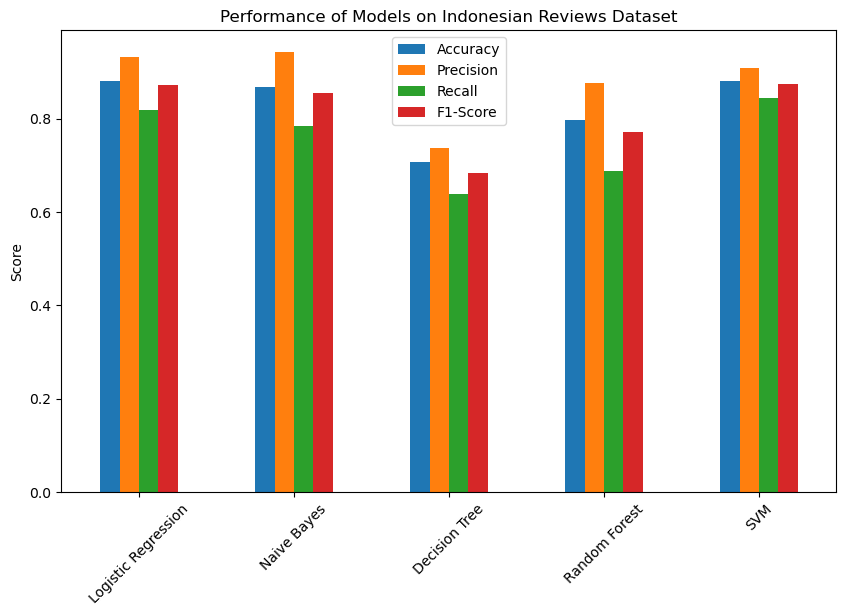

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot results
def plot_results(results, title):
    df = results.T  # Transpose the results for easier plotting
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

# Plot results for IMDB dataset
plot_results(results_imdb, "Performance of Models on IMDB Dataset")

# Plot results for Indonesian Reviews dataset
plot_results(results_reviews, "Performance of Models on Indonesian Reviews Dataset")